## Week 5 Assessment
##### Using the NY.GDP.PCAP.PP.CD indicator, GDP per capita in current 'international dollars' on the year 2017, for a better like-for-like comparison between countries, and taking in consideration more specific data, like expediture on health (2017).


In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

import pandas as pd

YEAR = 2013
GDP_INDICATOR = 'NY.GDP.PCAP.PP.CD'
gdp_reset = pd.read_csv('WB_GDP_2017.csv')

HEALTH_INDICATOR = 'SH.XPD.CHEX.GD.ZS'
health_reset = pd.read_csv('WB_HE_2017.csv')
health_reset.head()

,country,year,SH.XPD.CHEX.GD.ZS
0,Afghanistan,2017,11.777236
1,Albania,2017,5.010597
2,Algeria,2017,6.380329
3,American Samoa,2017,NaN
4,Andorra,2017,6.544319


## Data Cleaning

Inspecting the data with head() and tail() shows that:

The last rows are aggregated data, for the Arab World, the Caribbean small states, and other country groups used by the World Bank;
* GDP and health expenditure values are missing for some countries.
* The data is therefore cleaned by:


1. removing the first last 46 rows from 217 to 263;
2. removing rows with unavailable values.

First we visualize the rows to be deleted.

In [2]:
gdp = gdp_reset[217:]
gdp

,country,year,NY.GDP.PCAP.PP.CD
217,Arab World,2017,14562.331960
218,Caribbean small states,2017,15612.302440
219,Central Europe and the Baltics,2017,29880.010480
220,Early-demographic dividend,2017,8982.363607
221,East Asia & Pacific,2017,16336.048980
222,East Asia & Pacific (excluding high income),2017,12986.322230
223,East Asia & Pacific (IDA & IBRD countries),2017,13123.151790
224,Euro area,2017,45598.940310
225,Europe & Central Asia,2017,33982.219700
226,Europe & Central Asia (excluding high income),2017,20798.672970


In [3]:
gdp_countries = gdp_reset[:218].dropna()
health_countries = health_reset[:218].dropna()

gdp_clean = gdp_countries.dropna()
health_clean = health_countries.dropna()

gdp_clean[1:10]

,country,year,NY.GDP.PCAP.PP.CD
1,Albania,2017,12770.979720
2,Algeria,2017,11737.409350
5,Angola,2017,7310.901738
6,Antigua and Barbuda,2017,19840.076120
7,Argentina,2017,23597.117750
8,Armenia,2017,12115.057010
9,Aruba,2017,38442.413840
10,Australia,2017,48482.647460
11,Austria,2017,54169.963990


In [4]:
health_clean[1:10]

,country,year,SH.XPD.CHEX.GD.ZS
1,Albania,2017,5.010597
2,Algeria,2017,6.380329
4,Andorra,2017,6.544319
5,Angola,2017,2.791503
6,Antigua and Barbuda,2017,5.170942
7,Argentina,2017,10.457044
8,Armenia,2017,10.362705
10,Australia,2017,9.205448
11,Austria,2017,10.382624


## Transforming the data
The World Bank reports GDP in US dollars and cents. To make the data easier to read, the GDP is converted to millions of British pounds (the author's local currency) with the following auxiliary functions, using the average 2013 dollar-to-pound conversion rate provided by <http://www.ukforex.co.uk/forex-tools/historical-rate-tools/yearly-average-rates>. 

In [5]:
def roundCurrency (value):
    value = float(value)
    return round(value)

def usdToGBP (usd):
    usd = float(usd)
    convert_usd = usd/1.564768
    return convert_usd

GDP = 'GDP (£)'

gdp_clean[GDP] = gdp_clean[GDP_INDICATOR].apply(usdToGBP).apply(roundCurrency)
gdp_clean.head()


,country,year,NY.GDP.PCAP.PP.CD,GDP (£)
0,Afghanistan,2017,2058.383832,1315
1,Albania,2017,12770.979720,8162
2,Algeria,2017,11737.409350,7501
5,Angola,2017,7310.901738,4672
6,Antigua and Barbuda,2017,19840.076120,12679


It is clearly seen that some rows have been dropped.
The unnecessary columns can be dropped.

In [6]:
COUNTRY = 'country'
headings = [COUNTRY, GDP]
gdpClean = gdp_clean[headings]
gdpClean.head()

,country,GDP (£)
0,Afghanistan,1315
1,Albania,8162
2,Algeria,7501
5,Angola,4672
6,Antigua and Barbuda,12679


The World Bank reports the life expectancy with several decimal places. After rounding, the original column is discarded.

In [7]:
HEALTH = 'Health Expenditure (% of GDP)'
health_clean[HEALTH] = health_clean[HEALTH_INDICATOR].apply(round)
headings = [COUNTRY, HEALTH]
healthClean = health_clean[headings]
healthClean.head()

,country,Health Expenditure (% of GDP)
0,Afghanistan,12
1,Albania,5
2,Algeria,6
4,Andorra,7
5,Angola,3


## Combining the data

The tables are combined through an inner join on the common 'country' column. 

In [8]:
gdpVsHealth = pd.merge(gdpClean, healthClean, on=COUNTRY, how='inner')
gdpVsHealth.head()

,country,GDP (£),Health Expenditure (% of GDP)
0,Afghanistan,1315,12
1,Albania,8162,5
2,Algeria,7501,6
3,Angola,4672,3
4,Antigua and Barbuda,12679,5


## Calculating the correlation

To measure if the life expectancy and the GDP grow together, the Spearman rank correlation coefficient is used. It is a number from -1 (perfect inverse rank correlation: if one indicator increases, the other decreases) to 1 (perfect direct rank correlation: if one indicator increases, so does the other), with 0 meaning there is no rank correlation. A perfect correlation doesn't imply any cause-effect relation between the two indicators. A p-value below 0.05 means the correlation is statistically significant.

In [9]:
from scipy.stats import spearmanr

gdpColumn = gdpVsHealth[GDP]
healthColumn = gdpVsHealth[HEALTH]
(correlation, pValue) = spearmanr(gdpColumn, healthColumn)
print('The correlation is', correlation)
if pValue < 0.05:
    print('It is statistically significant.')
else:
    print('It is not statistically significant.')

The correlation is 0.2542323992985154
It is statistically significant.


The value shows a direct correlation, i.e. richer countries tend to have a higher health expenditure.

## Showing the data

Measures of correlation can be misleading, so it is best to see the overall picture with a scatterplot. The GDP axis uses a logarithmic scale to better display the vast range of GDP values, from a few thousands to several millions pounds.

Text(0, 0.5, 'Health Expenditure (% of GDP)')

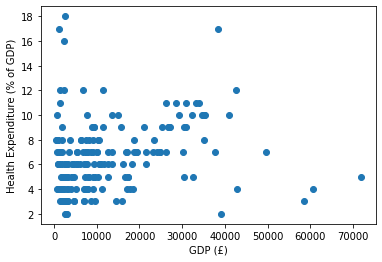

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(gdpVsHealth[GDP], gdpVsHealth[HEALTH])
plt.xlabel(GDP)
plt.ylabel(HEALTH)

The plot shows there is no clear correlation: there are rich countries with low health expenditure, poor countries with high health expenditure, and countries with around 10 thousand GDP have almost the full range of values, from below 12 percent. Towards the lower and higher end of GDP, the variation diminishes. Above 40 thousand pounds of GDP (4th tick mark to the right of the x axis), most countries have a health expenditure of 2% or more, whilst below that threshold most countries' health expenditure is below 12%.

Comparing the 10 poorest countries and the 10 countries with the lowest health expenditure shows that total GDP is a better measure because population and purchasing power have been taken into account.

In [11]:
# the 10 countries with lowest GDP
gdpVsHealth.sort_values(GDP).head(10)

,country,GDP (£),Health Expenditure (% of GDP)
26,Burundi,494,8
31,Central African Republic,583,7
97,Malawi,663,10
37,"Congo, Dem. Rep.",677,4
118,Niger,744,8
110,Mozambique,820,8
93,Liberia,969,8
162,Togo,969,6
96,Madagascar,1013,6
32,Chad,1014,4


In [12]:
# the 10 countries with lowest health expenditure
gdpVsHealth.sort_values(HEALTH).head(10)

,country,GDP (£),Health Expenditure (% of GDP)
45,Djibouti,3122,2
126,Papua New Guinea,2741,2
23,Brunei Darussalam,38981,2
12,Bangladesh,2659,2
83,Kazakhstan,15889,3
29,Cameroon,2272,3
38,"Congo, Rep.",2732,3
132,Qatar,58628,3
123,Pakistan,2921,3
51,Equatorial Guinea,14412,3
